# Getting started


Getting started with all kinds of functions related to the postgresql database

In [1]:
# the following two lines indicate that external functions are auto-reloaded as soon as they change. 
%load_ext autoreload
%autoreload 2
# Print statements 
from __future__ import print_function # Python 2.x

In [2]:
# General stuff:
import sys
import argparse
import os
import json
import numpy as np
import math
import psycopg2
import cPickle
import numpy as np
import pandas as pd
from datetime import date
from tqdm import tqdm_notebook

# Plotting:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
sns.set_style('whitegrid')
# External functions from subfolder /database_helpers. 
# as soon as you change something in there and press save, it will auto reload on next execution.
from database_helpers.psql_start import *
from database_helpers.create_tables import *
from database_helpers.write2tables import *
from postgres_analysis_helpers.general import *
from postgres_analysis_helpers.get_data import *
from postgres_analysis_helpers.circstat_functions import *
# register pickle type to retrieve binary data from database
psycopg2.extensions.register_type(psycopg2.extensions.new_type(psycopg2.BINARY.values, 'BINARY-PICKLE', cast_pickle))

Loaded analysis helpers: General
Loaded postgres_analysis_helpers -> general
Loaded postgres_analysis_helpers -> get_data
Loaded postgres_analysis_helpers -> circstat_functions


In [3]:
db_status = test_connect()
if db_status == False:
    print('Grrr... no database connection could be established.')
else:
    print('Yippiyeah! Database connection is established!')

Connecting to the PostgreSQL database...
Yippiyeah! Database connection is established!


### Query the database 

In [58]:
base_dataframe = pd.DataFrame() # create empty dataframe or feed in a base dataframe from before! *

In [59]:
psql = psql_neuroballs(base_dataframe)

78 animals across 5 experimenters found.
Total # of sessions: 8464 (unique clusters: 15136)


In [60]:
psql.retrieve_data()

Retrieving data ... (Empty dataframe) ...
632 entries retrieved.


### get out data ...

In [61]:
grids = psql.data()

In [62]:
grids.sort_values('grid_score_bnt',ascending=False,inplace=True)

In [52]:
# it looks like this:
grids.head(3)

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,spiketimes_cluster_bnt,theta_mean_phase_bnt,theta_strength_bnt,sparsity_bnt,...,coherence_bnt,gridstats_spacing_bnt,gridstats_ellipse_theta_bnt,calbindin_bnt,speedscore_bnt,autocorr_bnt,tc_stats_mvl_bnt,occupancy_map_bnt,informationcontent_bnt,meanrate_outside_fields_bnt
575,5,74470,horsto,2017-10-03 16:13:41,20,03102017s1,"[0.0214375, 0.0308958333333, 0.1124375, 0.1218...","[1.94005620581, 1.94204510823, 1.93661819034, ...","[0.518842589187, 0.52557671262, 0.537547333643...",0.561161,...,0.684313,"[[17.0293863659], [17.0880074906], [18.1107702...",168.687270,0.0,0.053676,"[[0.648982089855, 0.764608063439, 0.8423592785...",0.445629,"[[nan, 1.31847361325, 1.4276787706, 1.45456588...",0.758977,0.768093
630,8,74470,horsto,2017-09-30 14:28:12,55,30092017s2,"[0.652270833333, 0.666354166667, 0.7604375, 1....","[1.60689992011, 1.61362720583, 1.63269684023, ...","[0.196337214403, 0.199615046916, 0.19993132057...",0.596557,...,0.496182,"[[17.0293863659], [16.1554944214], [17.1172427...",109.183743,0.0,0.205628,"[[-0.165275715917, 0.110824240347, 0.233197326...",0.092693,"[[nan, nan, 1.04825039396, 1.29741210797, 1.40...",0.653242,0.616445
579,6,74470,horsto,2017-10-03 16:13:41,12,03102017s1,"[2.64141666667, 2.8856875, 5.27179166667, 5.47...","[1.79312154191, 1.8110080987, 1.80649017201, 1...","[0.245460604034, 0.25114927582, 0.259267110774...",0.432475,...,0.340890,"[[26.0768096208], [27.2946881279], [25.5538646...",143.885660,0.0,0.001144,"[[-0.717908188373, -0.742591020366, -0.7448560...",0.116188,"[[nan, 1.31847361325, 1.4276787706, 1.45456588...",1.029363,0.093271


In [15]:
grids_dave = grids.iloc[:50]

In [16]:
grids_horst = grids.iloc[:50]

In [29]:
psql = psql_neuroballs(grids_dave)
psql.retrieve_data()

78 animals across 5 experimenters found.
Total # of sessions: 8464 (unique clusters: 15136)
Length of input dataframe: 50


Retrieving data ... Dataframe not empty


Success. NaNs: 0



In [38]:
grids_dave = psql.data()

In [39]:
grids_dave.head(2)

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,grid_score_bnt,masked_ratemap_bnt
0,8,7945,davidcr,2014-12-12 12:19:53,1,12122014rw1,1.38015,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
1,5,T4743,davidcr,2016-11-01 09:35:27,27,01112016s1,1.33987,"[[0.916306123258, 1.14654121597, 1.57718685041..."


(array([ 11.,   8.,   7.,   8.,   4.,   4.,   2.,   2.,   3.,   1.]),
 array([ 0.84364275,  0.89230631,  0.94096988,  0.98963344,  1.03829701,
         1.08696057,  1.13562414,  1.18428771,  1.23295127,  1.28161484,
         1.3302784 ]),
 <a list of 10 Patch objects>)

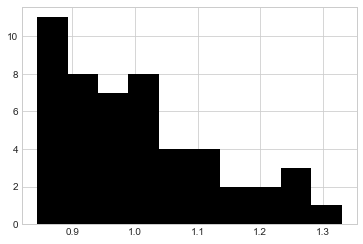

In [29]:
plt.hist(grids_horst.grid_score_bnt,color='k')

(array([ 6.,  6.,  5.,  8.,  3.,  7.,  5.,  5.,  4.,  1.]),
 array([ 1.04842824,  1.0816003 ,  1.11477236,  1.14794443,  1.18111649,
         1.21428856,  1.24746062,  1.28063269,  1.31380475,  1.34697681,
         1.38014888]),
 <a list of 10 Patch objects>)

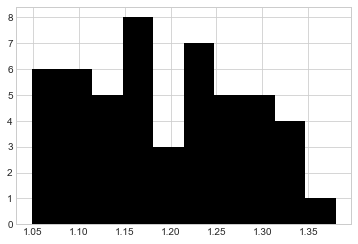

In [40]:
plt.hist(grids_dave.grid_score_bnt,color='k')

In [12]:
base_dataframe.animal_id.unique()

array(['74470'], dtype=object)

In [21]:
grids.columns

Index([u'tetrode_no', u'animal_id', u'n_drive_user', u'session_ts',
       u'cluster_no', u'session_name', u'theta_mean_phase_bnt',
       u'theta_strength_bnt', u'sparsity_bnt', u'tc_stats_peakdirection_bnt',
       u'borderscore_bnt', u'params_bnt', u'gridstats_ellipse_bnt',
       u'tc_stats_hd_peakrate_bnt', u'mean_rate_bnt', u'masked_ratemap_bnt',
       u'angular_stability_bnt', u'peak_rate_bnt', u'selectivity_bnt',
       u'stability_half_bnt', u'tc_stats_mean_direction_bnt',
       u'bins_angle_center_bnt', u'grid_score_bnt',
       u'gridstats_orientation_bnt', u'numfields_bnt', u'calbindin_dist_bnt',
       u'hist_angle_smooth_bnt', u'informationrate_bnt', u'fieldmain_bnt',
       u'coherence_bnt', u'gridstats_spacing_bnt',
       u'gridstats_ellipse_theta_bnt', u'calbindin_bnt', u'speedscore_bnt',
       u'autocorr_bnt', u'tc_stats_mvl_bnt', u'occupancy_map_bnt',
       u'informationcontent_bnt', u'meanrate_outside_fields_bnt',
       u'head_offset', u'head_offset_var', u'px

In [ ]:
base_dataframe_exc = base_dataframe[(base_dataframe.salt_p < 0.01) & (base_dataframe.salt_i > 0.1)]

In [ ]:
plt.hist([x for x in base_dataframe_exc.ex_latency_median if (np.isfinite(x) and x < 10 and x > -8)],50,color='k',alpha=.7)
plt.show()

### Now that you have a dataframe of inhibited cells, get the rest of the columns 

In [ ]:
base_dataframe_exc.drop('session_name',1,inplace=True)

In [ ]:
psql = psql_neuroballs(base_dataframe_exc)

In [ ]:
# select ALL the info that you want
psql.retrieve_data()

In [ ]:
base_dataframe_exc = psql.data()

In [ ]:
base_dataframe_exc.head(2)

In [ ]:
# sort ascending by p-value (in 30 ms interval - works well)
base_dataframe_exc.sort_values(by='salt_i', ascending=False,inplace=True)

In [ ]:
base_dataframe_exc.columns

In [14]:
base_dataframe.sort_values(by='grid_score_bnt',ascending=False,inplace=True)

In [15]:
grids = base_dataframe.iloc[:20]

### Drawing functions

In [45]:
# draw_path_spike_plots 
# expects 'spiket_tracking_session' and 'tracking_session' from KLUSTA ! 
# Can be found under "Spiketimes + Tracking" and "Tracking" in the GUI
#draw_path_spike_plots(grids,grids,7,speed_cutoff=5.,offset=0,plot_hd=False)


Generating plot ...


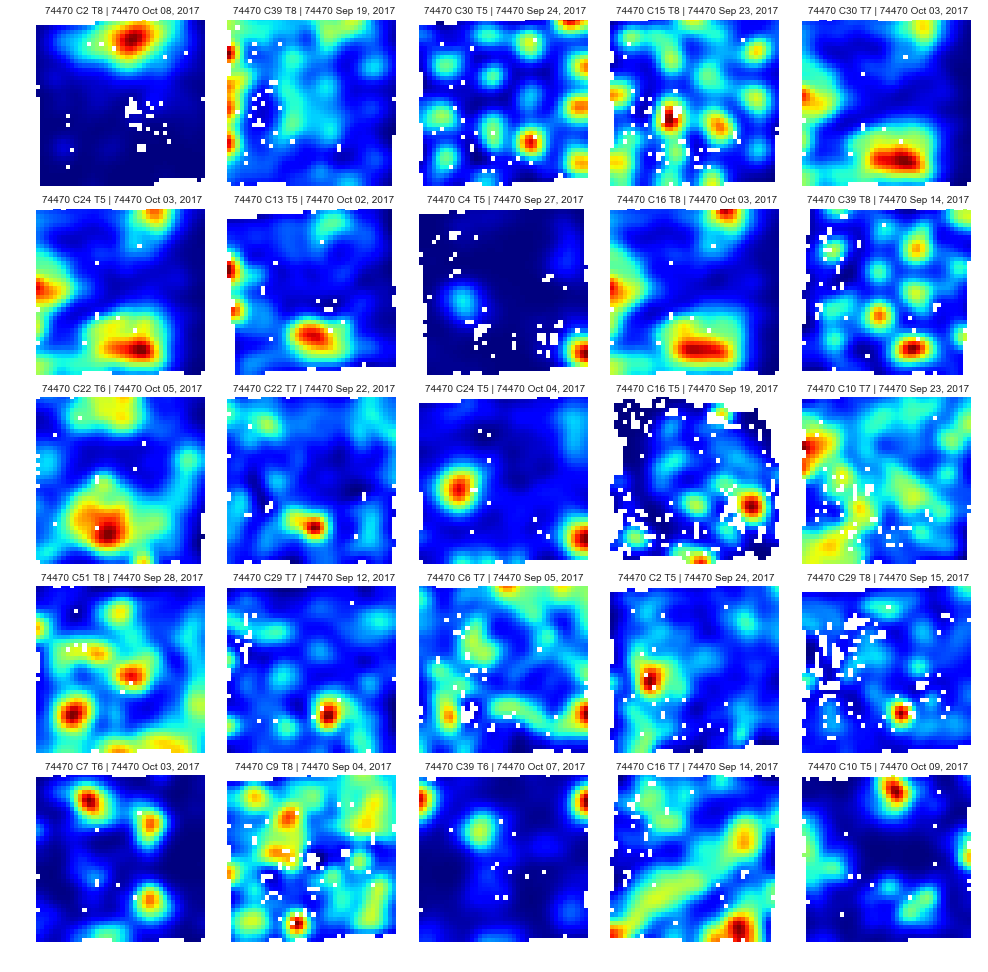

In [67]:
# draw_ratemaps
# feed in a dataframe and a column name (for example ratemaps or autocorrelation maps from BNT)
draw_ratemaps(grids,'masked_ratemap_bnt',25,25) # 25 plots, from start ('0') of dataframe


Generating plot ...


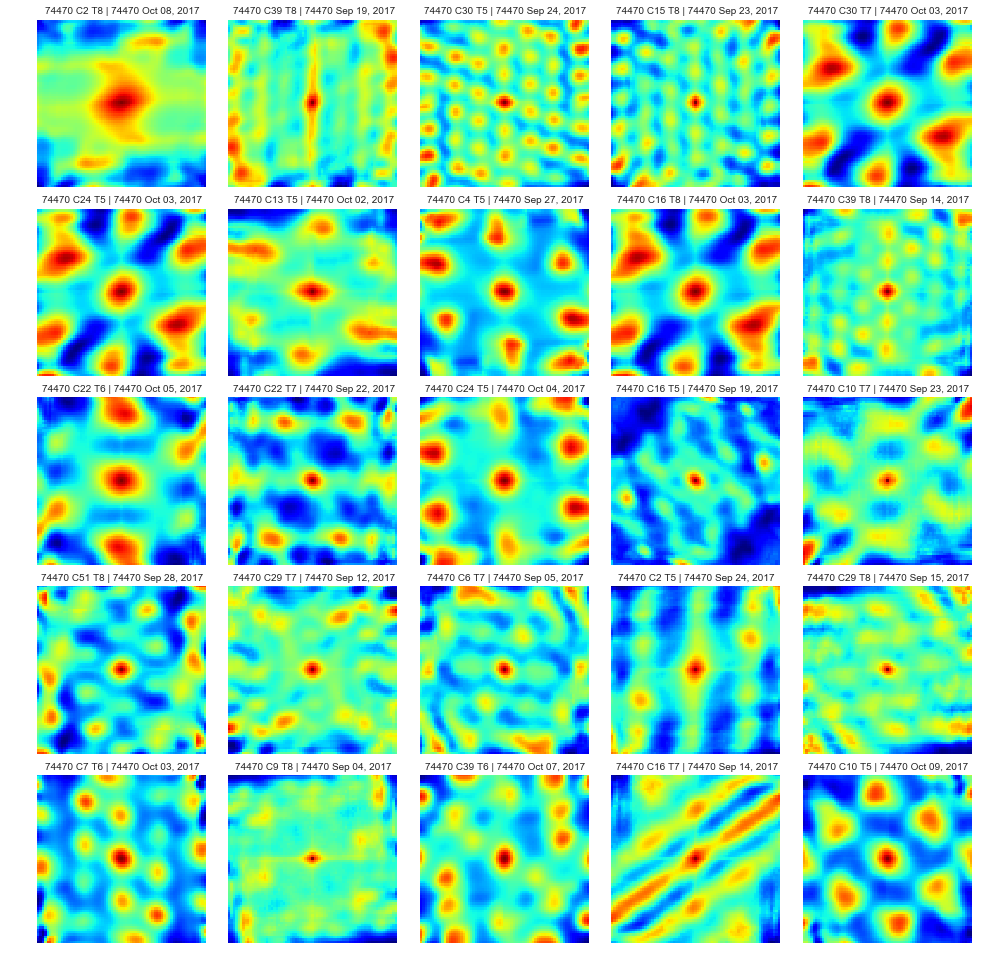

In [68]:
# ... and here are the corresponding auto correlations
draw_ratemaps(grids,'autocorr_bnt',25,25)

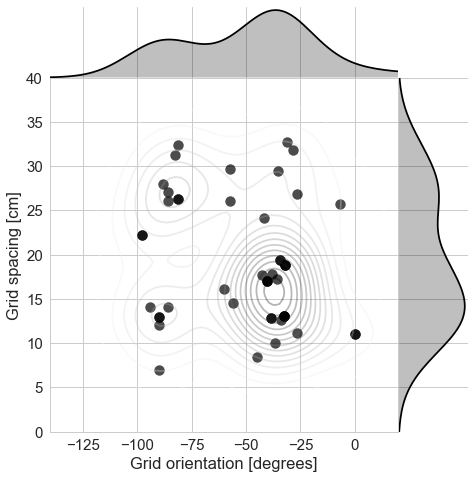

In [70]:
sns.set(font_scale=1.5) 
sns.set_style('whitegrid')
grids = grids.iloc[:50]
grids['first_grid_orientation'] = [x[0] for x in grids['gridstats_orientation_bnt']]
grids['first_grid_spacing'] = [x[0] for x in grids['gridstats_spacing_bnt']]
grids['second_grid_orientation'] = [x[1] for x in grids['gridstats_orientation_bnt']]
grids['second_grid_spacing'] = [x[1] for x in grids['gridstats_spacing_bnt']]
grids['third_grid_orientation'] = [x[2] for x in grids['gridstats_orientation_bnt']]
grids['third_grid_spacing'] = [x[2] for x in grids['gridstats_spacing_bnt']]
g = sns.jointplot(grids['first_grid_orientation'],grids['first_grid_spacing'], kind="kde", size=7,
                  space=0,color='k',shade=False,n_levels=15,alpha=.3,stat_func=None)
g.plot_joint(plt.scatter, marker='o', c='k', s=100,alpha=.7)
g.ax_joint.set(xlim=(-140, 20), ylim=(0, 40),xlabel='Grid orientation [degrees]',ylabel='Grid spacing [cm]')

plt.show(g)


In [48]:
20/14.

1.4285714285714286

In [46]:
20*.2

4.0

In [44]:
grids.px_to_cm

0    0.201893
1    0.201893
2    0.194293
3    0.201893
4    0.201258
5    0.199253
6    0.201893
7    0.201893
Name: px_to_cm, dtype: object

In [ ]:
# draw_tuning_curves
# Can be used for both theta-tuning as well as HD tuning plots. 
# Feed in a dataframe (first argument) and (second argument) in square brackets the "center" and "smoothed points" vectors ... 
draw_tuning_curves(base_dataframe,['bins_angle_center_bnt','hist_angle_smooth_bnt'],25,0,'W')

In [ ]:
# create_spike_plots_stimulus
# Requires the data from "Stimulus mats" and "Stimulus stats" in the GUI
# However - BUG ALERT!: You can not retrieve them at the same time (mark the entries of both tables), but only sequentially 
# The "True" at the end means that spikes will be plotted as dark squares (takes forever!)
# Replace with "False" if you just want the binned activity in 1 ms bins.
create_spike_plots_stimulus(base_dataframe_exc,5,0,False)

In [ ]:
create_spike_plots_stimulus(base_dataframe_exc,5,0,True)

In [ ]:
# draw_spiket_LFP:
# Draws spike triggered LFP (found under "Theta phase tuning" in GUI)
draw_spiket_LFP(base_dataframe_exc,5,0,sample_rate=250.)

In [ ]:
# draw_auto_corrs
# Draws spiketime auto correlations (Found under "Spiketime autocorr" in GUI)
draw_auto_corrs(base_dataframe_exc, 5, 0)

In [ ]:
# draw_waveforms
# Draws mean waveforms of every channel
draw_waveforms(base_dataframe_exc, 5, 0)